# Reproducibility Check: Compare French et al. 2012 to Current Data
- Use the same 25 F ring observations used in 2012
- Compare the EWs
- Primary differences in methodology:
  - 2012 used CISSCAL 3.6 while 2021 used CISSCAL 4.0
  - 2012 used radial extents from 138,465-141,835 while 2021 used 139,223-141,223
 

In [25]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [26]:
# Read the new data and populate the old data
obsdata = pd.read_csv('../data_files/good_qual_full.csv', parse_dates=['Date'])
olddata_dict = {
    'ISS_000RI_SATSRCHAP001_PRIME': [ 2.6, 0.8],
    'ISS_00ARI_SPKMOVPER001_PRIME': [ 3.1, 0.6],
    'ISS_006RI_LPHRLFMOV001_PRIME': [ 4.7, 0.9],
    'ISS_007RI_LPHRLFMOV001_PRIME': [ 1.5, 0.3],
    'ISS_029RF_FMOVIE001_VIMS':     [12.6, 2.7],
    'ISS_031RF_FMOVIE001_VIMS':     [10.3, 1.4],
    'ISS_032RF_FMOVIE001_VIMS':     [ 9.9, 1.8],
    'ISS_033RF_FMOVIE001_VIMS':     [12.9, 1.7],
    'ISS_036RF_FMOVIE001_VIMS':     [13.6, 5.3],
    'ISS_036RF_FMOVIE002_VIMS':     [ 2.9, 2.2],
    'ISS_039RF_FMOVIE002_VIMS':     [ 2.7, 1.7],
    'ISS_039RF_FMOVIE001_VIMS':     [ 1.7, 1.0],
    'ISS_041RF_FMOVIE002_VIMS':     [ 1.8, 1.0],
    'ISS_041RF_FMOVIE001_VIMS':     [ 2.1, 0.9],
    'ISS_044RF_FMOVIE001_VIMS':     [ 2.4, 0.9],
    'ISS_051RI_LPMRDFMOV001_PRIME': [ 8.1, 1.6],
    'ISS_055RF_FMOVIE001_VIMS':     [ 1.3, 0.3],
    'ISS_055RI_LPMRDFMOV001_PRIME': [ 3.2, 0.5],
    'ISS_057RF_FMOVIE001_VIMS':     [ 1.3, 0.3],
    'ISS_068RF_FMOVIE001_VIMS':     [ 0.9, 0.1],
    'ISS_075RF_FMOVIE002_VIMS':     [ 1.2, 0.2],
    'ISS_083RI_FMOVIE109_VIMS':     [ 1.9, 0.6],
    'ISS_087RF_FMOVIE003_PRIME':    [ 0.9, 0.2],
    'ISS_089RF_FMOVIE003_PRIME':    [ 1.0, 0.2],
    'ISS_100RF_FMOVIE003_PRIME':    [ 0.8, 0.1]
}
olddata_obsname = olddata_dict.keys() 
olddata_ew = [x[0] for x in olddata_dict.values()]
olddata_std = [x[1] for x in olddata_dict.values()]
olddata = pd.DataFrame({'EW':          olddata_ew, 
                        'EW Std':      olddata_std},
                       index=olddata_obsname)
# Find the intersection of the old and new data
# This should be the same number of observations as the old data
intersection = obsdata.join(olddata, on='Observation', how='inner', rsuffix='_old')
intersection['EW Ratio'] = intersection['EW']/intersection['EW_old']
len(obsdata), len(olddata), len(intersection)

(152, 25, 25)

Text(0.5, 1.0, 'EW Ratio vs Date')

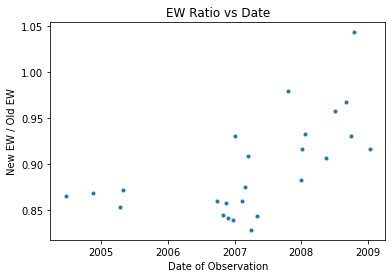

In [27]:
plt.plot(intersection['Date'], intersection['EW Ratio'], '.')
plt.xlabel('Date of Observation')
plt.ylabel('New EW / Old EW')
plt.title('EW Ratio vs Date')

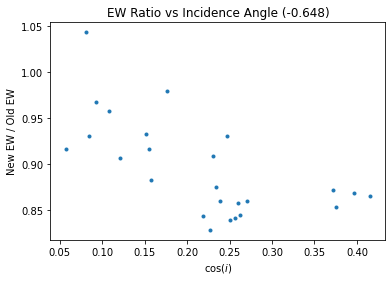

In [37]:
plt.plot(np.cos(np.radians(intersection['Incidence'])), intersection['EW Ratio'], '.')
plt.xlabel('$\cos(i)$')
plt.ylabel('New EW / Old EW')
_=plt.title('EW Ratio vs Incidence Angle ({:.3f})'.format(np.corrcoef(np.cos(np.radians(intersection['Incidence'])), intersection['EW Ratio'])[0,1]))

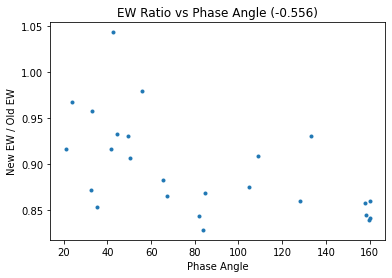

In [39]:
plt.plot(intersection['Mean Phase'], intersection['EW Ratio'], '.')
plt.xlabel('Phase Angle')
plt.ylabel('New EW / Old EW')
_=plt.title('EW Ratio vs Phase Angle ({:.3f})'.format(np.corrcoef(intersection['Mean Phase'], intersection['EW Ratio'])[0,1]))

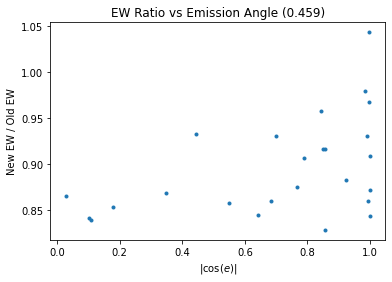

In [41]:
plt.plot(np.abs(np.cos(intersection['Mean Emission'])), intersection['EW Ratio'], '.')
plt.xlabel('$|\cos(e)|$')
plt.ylabel('New EW / Old EW')
_=plt.title('EW Ratio vs Emission Angle ({:.3f})'.format(np.corrcoef(np.abs(np.cos(intersection['Mean Emission'])), intersection['EW Ratio'])[0,1]))

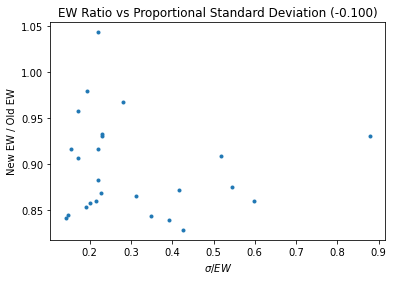

In [42]:
plt.plot(intersection['EW Std']/intersection['EW'], intersection['EW Ratio'], '.')
plt.xlabel('$\sigma/EW$')
plt.ylabel('New EW / Old EW')
_=plt.title('EW Ratio vs Proportional Standard Deviation ({:.3f})'.format(np.corrcoef(intersection['EW Std']/intersection['EW'], intersection['EW Ratio'])[0,1]))

In [32]:
cisscal_ratio_dict = { # CISSCAL 4.0 / CISSCAL 3.6 median ratio for one image
    'ISS_000RI_SATSRCHAP001_PRIME': 1.,
    'ISS_00ARI_SPKMOVPER001_PRIME': 0.889,
    'ISS_006RI_LPHRLFMOV001_PRIME': 0.917,
    'ISS_007RI_LPHRLFMOV001_PRIME': 0.918,
    'ISS_029RF_FMOVIE001_VIMS':     1.298,
    'ISS_031RF_FMOVIE001_VIMS':     0.925,
    'ISS_032RF_FMOVIE001_VIMS':     0.925,
    'ISS_033RF_FMOVIE001_VIMS':     1.072,
    'ISS_036RF_FMOVIE001_VIMS':     1.094,
    'ISS_036RF_FMOVIE002_VIMS':     1.002,
    'ISS_039RF_FMOVIE002_VIMS':     1.076,
    'ISS_039RF_FMOVIE001_VIMS':     1.005,
    'ISS_041RF_FMOVIE002_VIMS':     0.968,
    'ISS_041RF_FMOVIE001_VIMS':     1.245,
    'ISS_044RF_FMOVIE001_VIMS':     1.014,
    'ISS_051RI_LPMRDFMOV001_PRIME': 1.098,
    'ISS_055RF_FMOVIE001_VIMS':     0.994,
    'ISS_055RI_LPMRDFMOV001_PRIME': 0.933,
    'ISS_057RF_FMOVIE001_VIMS':     1.054,
    'ISS_068RF_FMOVIE001_VIMS':     1.061,
    'ISS_075RF_FMOVIE002_VIMS':     0.982,
    'ISS_083RI_FMOVIE109_VIMS':     0.938,
    'ISS_087RF_FMOVIE003_PRIME':    0.936,
    'ISS_089RF_FMOVIE003_PRIME':    0.936,
    'ISS_100RF_FMOVIE003_PRIME':    1.000
}
cr_obsname = cisscal_ratio_dict.keys() 
cr_ratio = cisscal_ratio_dict.values()
crdata = pd.DataFrame({'CISSCAL Ratio': cr_ratio},
                       index=cr_obsname)

In [33]:
intersection = intersection.join(crdata, on='Observation', how='inner', rsuffix='_old')
len(intersection)

25

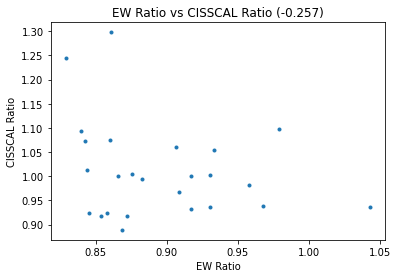

In [43]:
plt.plot(intersection['EW Ratio'], intersection['CISSCAL Ratio'], '.')
plt.xlabel('EW Ratio')
plt.ylabel('CISSCAL Ratio')
_=plt.title('EW Ratio vs CISSCAL Ratio ({:.3f})'.format(np.corrcoef(intersection['EW Ratio'], intersection['CISSCAL Ratio'])[0,1]))

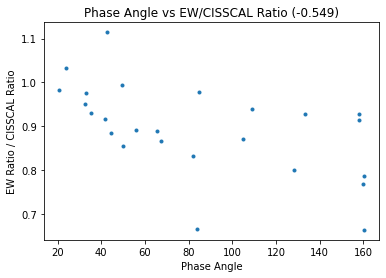

In [45]:
plt.plot(intersection['Mean Phase'], intersection['EW Ratio']/intersection['CISSCAL Ratio'], '.')
plt.xlabel('Phase Angle')
plt.ylabel('EW Ratio / CISSCAL Ratio')
_=plt.title('Phase Angle vs EW/CISSCAL Ratio ({:.3f})'.format(np.corrcoef(intersection['Mean Phase'], intersection['EW Ratio']/intersection['CISSCAL Ratio'])[0,1]))

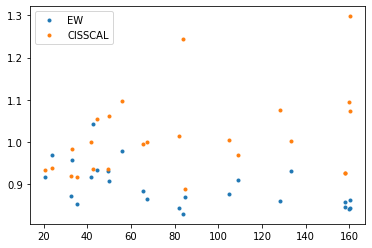

In [47]:
plt.plot(intersection['Mean Phase'], intersection['EW Ratio'], '.', label='EW')
plt.plot(intersection['Mean Phase'], intersection['CISSCAL Ratio'], '.', label='CISSCAL')
plt.legend()


(0.8460012633369955, 0.949201609198719, 0.887565080437096, 0.8865416801089073)

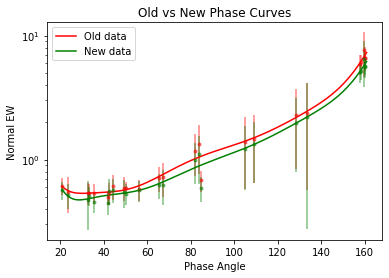

In [70]:
xrange = np.arange(intersection['Mean Phase'].min(), intersection['Mean Phase'].max()+1)
intersection['Normal EW_old'] = intersection['EW_old'] * np.abs(np.cos(np.radians(intersection['Mean Emission'])))
intersection['Normal EW Std_old'] = intersection['EW Std_old'] * np.abs(np.cos(np.radians(intersection['Mean Emission'])))
plt.errorbar(intersection['Mean Phase'], intersection['Normal EW_old'], yerr=intersection['Normal EW Std_old'], fmt='.', color='red', alpha=0.5)
plt.errorbar(intersection['Mean Phase'], intersection['Normal EW'], yerr=intersection['Normal EW Std'], fmt='.', color='green', alpha=0.5)
coeff_old = np.polyfit(intersection['Mean Phase'], intersection['Normal EW_old'], 8)
coeff_new = np.polyfit(intersection['Mean Phase'], intersection['Normal EW'], 8)
phase_model_old = np.polyval(coeff_old, xrange)
phase_model_new = np.polyval(coeff_new, xrange)
plt.plot(xrange, phase_model_old, '-', color='red', label='Old data')
plt.plot(xrange, phase_model_new, '-', color='green', label='New data')
plt.yscale('log')
plt.legend()
plt.xlabel('Phase Angle')
plt.ylabel('Normal EW')
plt.title('Old vs New Phase Curves')
phase_curve_ratio = phase_model_new / phase_model_old
np.min(phase_curve_ratio), np.max(phase_curve_ratio), np.mean(phase_curve_ratio), np.median(phase_curve_ratio)


In [74]:
ew_ratio = intersection['Normal EW'] / intersection['Normal EW_old']
ew_ratio.min(), ew_ratio.max(), ew_ratio.mean(), ew_ratio.median()

(0.8276222343003893, 1.0399173807590278, 0.8931248262368725, 0.875196385439345)

In [97]:
limited_intersection = intersection[intersection['Observation'] != 'ISS_041RF_FMOVIE001_VIMS']
limited_intersection = limited_intersection[limited_intersection['Observation'] != 'ISS_044RF_FMOVIE001_VIMS']
len(limited_intersection)

23

(0.8462076812141407,
 0.9501397204682491,
 0.8931547146301135,
 0.8847717706779701)

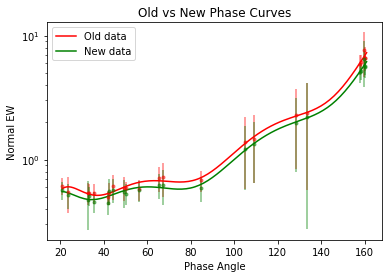

In [98]:
plt.errorbar(limited_intersection['Mean Phase'], limited_intersection['Normal EW_old'], yerr=limited_intersection['Normal EW Std_old'], fmt='.', color='red', alpha=0.5)
plt.errorbar(limited_intersection['Mean Phase'], limited_intersection['Normal EW'], yerr=limited_intersection['Normal EW Std'], fmt='.', color='green', alpha=0.5)
coeff_old = np.polyfit(limited_intersection['Mean Phase'], limited_intersection['Normal EW_old'], 8)
coeff_new = np.polyfit(limited_intersection['Mean Phase'], limited_intersection['Normal EW'], 8)
phase_model_old = np.polyval(coeff_old, xrange)
phase_model_new = np.polyval(coeff_new, xrange)
plt.plot(xrange, phase_model_old, '-', color='red', label='Old data')
plt.plot(xrange, phase_model_new, '-', color='green', label='New data')
plt.yscale('log')
plt.legend()
plt.xlabel('Phase Angle')
plt.ylabel('Normal EW')
plt.title('Old vs New Phase Curves')
phase_curve_ratio = phase_model_new / phase_model_old
np.min(phase_curve_ratio), np.max(phase_curve_ratio), np.mean(phase_curve_ratio), np.median(phase_curve_ratio)
